In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from ipywidgets import interact
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
print(type(iris)) # Ce n'est pas un DataFrame, mais une sorte de dictionnaire

<class 'sklearn.utils.Bunch'>


In [4]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


L'attribut feature_names contient le nom des différents paramètres de nos données, 
il s'agit des longueurs et largeurs de pétales et sépales.

In [5]:
iris.feature_names # Les noms des paramètres de nos donénes/enregistrements

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#Un aperçu des 5 premiers enregistrements:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

La liste des espèces connues, nos labels de classification, est contenue dans l'attribut target_names


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Création d'une variable target pour un accès plus facile à cet attribut:

In [8]:
target = iris.target # Les labels associés à chaque enregistrement
target               # target[0] est le label de iris['data'][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(target[ target == i]) ) )

classe : 0, nb exemplaires: 50
classe : 1, nb exemplaires: 50
classe : 2, nb exemplaires: 50


In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Observation des données
Avant de commencer à classer ses données il est toujours bon de visualiser à quoi elles ressemblent et 
si d'éventuelles relations se dessinent.

In [11]:
data = iris.data # Pour un accès plus rapide

In [12]:
# tableau numpy de 2 dimensions de 150 enregistrements de 4 valeurs
type(data), data.ndim, data.shape

(numpy.ndarray, 2, (150, 4))

Nous avons donc 150 observations de 4 valeurs. Visualisons les !

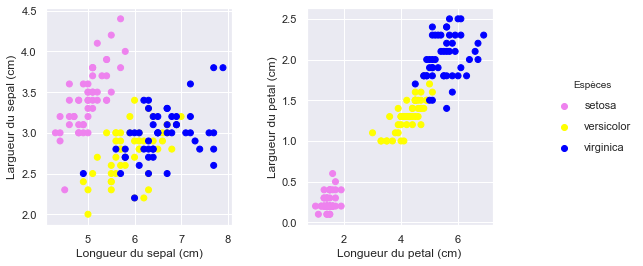

In [13]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in iris.target]

ax1.scatter(data[:, 0], data[:, 1], c=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(data[:, 2], data[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();

La séparation des groupes entre les longueurs et largeurs de pétales semble très nette et déterminante !
Nous pourrions aussi le faire entre les longueurs de pétales et largeurs de sépales et inversement même si 
cela semble moins naturel. La librairie Seaborn propose une matrice prête à l'emploi via le graphique 
Scatterplot Matrix pour réaliser ce type de graphique:

In [14]:
df = pd.DataFrame(data, columns=iris['feature_names'] )
df['target'] = target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


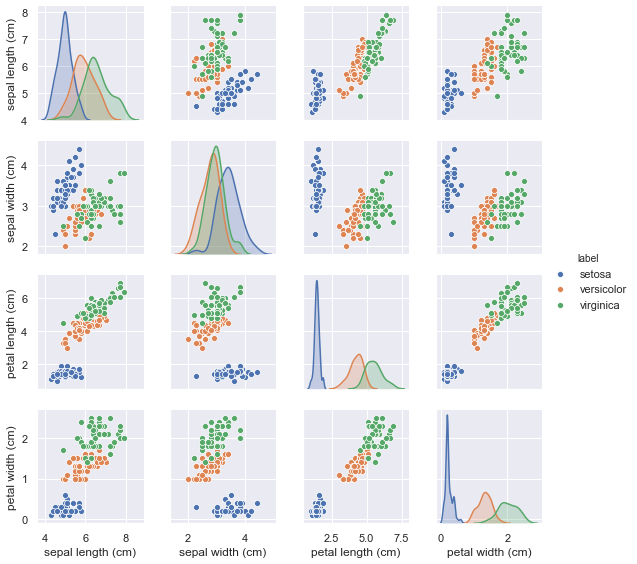

In [15]:
sns.pairplot(df, hue='label', vars=iris['feature_names'], size=2);

Apprentissage
Nous pourrions ici utiliser plusieurs algorithmes.
Nous proposons de commencer par la classification Naive Bayes qui suppose que chaque classe est construite 
à partir d'une distribution Gaussiènne alignée. Elle n'impose pas de définir d'hyperparamètres et est très rapide.

In [18]:
#Création du classifieur
clf = GaussianNB()
clf.fit(data, target) # On aurait aussi pu utiliser le dataframe df
print(dir(clf))
clf.get_params()

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_joint_log_likelihood', '_partial_fit', '_update_mean_variance', 'class_count_', 'class_prior_', 'classes_', 'epsilon_', 'fit', 'get_params', 'partial_fit', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'score', 'set_params', 'sigma_', 'theta_', 'var_smoothing']


{'priors': None, 'var_smoothing': 1e-09}

In [19]:
#Exécutons la prédiction sur les données d'apprentissage elles-mêmes

result = clf.predict(data)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Qualité de la prédiction
Observons la qualité de la prédiction

Là ou la prédiction est juste, la différence de result - target doit être égale à 0. 
Si la prédiction est parfaite nous aurons des zéros dans tout le tableau. Ce qui est à peine le cas.

In [20]:
result - target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Calculons le pourcentage d'erreur:

In [24]:
errors = sum(result != target) 
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150)

Nb erreurs: 6
Pourcentage de prédiction juste: 96.0


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(result, target) 

0.96

In [ ]:
# calculons la matrice de confusion:

In [28]:
conf = confusion_matrix(target, result)
conf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [ ]:
représentons le Heatmap avec seaborn

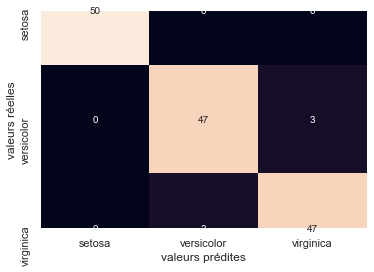

In [29]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

L'on observe ici que:
-L'espèce Setosa a été parfaitement identifiée
-3 Virginica ont été confondues avec des Versicolor et inversemment
Ce n'est pas très surprenant les graphiques montrent une nette séparation des Setosa avec 
les 2 autres groupes qui sont nettement moins détachés.

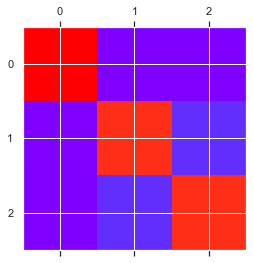

In [30]:
plt.matshow(conf, cmap='rainbow');

Séparation du jeu de tests et d'apprentissage

Nous ne disposons que d'un seul jeu de données connues.
Généralement l'on teste l'algorithme sur de nouvelles données, sinon les résultats sont forcément toujours très bons.
Nous pourrions choisir un enregistrement sur 2 comme ci-dessous:

In [31]:
data_test, target_test = data[::2], target[::2]
data_train, target_train = data[1::2], target[1::2]
target_test, target_train, len(target_test), len(target_train)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]),
 75,
 75)

Le module model_selection de Scikit-Learn propose des fonctions pour séparer le jeu de données du jeu de tests 
qui sont attentives à ce type de petits problèmes:

In [32]:
# from sklearn.cross_validation import train_test_split # Version 0.17.1
from sklearn.model_selection import train_test_split # version 0.18.1
# split the data with 50% in each set
data_test = train_test_split(data, target
                                 , random_state=0
                                 , train_size=0.8)
data_train, data_test, target_train, target_test = data_test

La fonction train_test_split permet de décomposer le jeu de données en 2 groupes: 
les données pour l'apprentissage et les données pour les tests.
Le paramètre train_size indique la taille du jeu d'apprentissage qui sera utilisé: 80% des enregistrements.

In [33]:
data_test[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

In [34]:
#Il ne reste plus qu'à relancer la classification:

clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test)

 calculons de nouveau la qualité de la prédiction:

In [36]:
# Score
accuracy_score(result, target_test)

0.9466666666666667

Affichons la matrice de confusion:

In [37]:
# Matrice de confusion
conf = confusion_matrix(target_test, result)
conf

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]], dtype=int64)

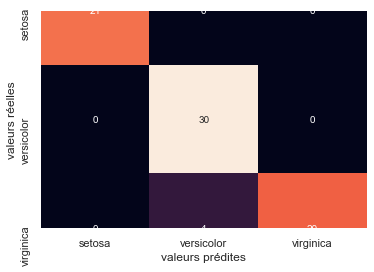

In [38]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

Sur les 75 plantes prédites, 4 Virginica ont été confondues avec des Versicolor

Affichons les territoires de la classification

In [39]:
# On ne conserve que les longueurs/largeurs des sépales
data = iris.data[:, :2]
target = iris.target
data[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [40]:
# On réapprend
clf = GaussianNB()
clf.fit(data, target)
h = .15
# Nous recherchons les valeurs min/max de longueurs/largeurs des sépales
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

In [41]:
x, y

(array([3.3 , 3.45, 3.6 , 3.75, 3.9 , 4.05, 4.2 , 4.35, 4.5 , 4.65, 4.8 ,
        4.95, 5.1 , 5.25, 5.4 , 5.55, 5.7 , 5.85, 6.  , 6.15, 6.3 , 6.45,
        6.6 , 6.75, 6.9 , 7.05, 7.2 , 7.35, 7.5 , 7.65, 7.8 , 7.95, 8.1 ,
        8.25, 8.4 , 8.55, 8.7 , 8.85]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  , 4.15,
        4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35]))

In [42]:
#Affichons les longueurs/largeurs min et max observées:

x_min, x_max, y_min, y_max

(3.3, 8.9, 1.0, 5.4)

La fonction meshgrid permet d'obtenir une grille de coordonnées pour les valeurs des points comprises 
entre x_min, x_max et y_min, y_max


In [44]:
xx, yy = np.meshgrid(x,y )

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# applatit les données du tableau
data_samples = list(zip(xx.ravel(), yy.ravel()) )

Explications:
Le tableau xx contient les différentes longueurs répétées autant de fois que nous avons de mesures pour les largeurs:

In [45]:
xx # Vecteur des valeurs de X répété autant de fois que l'on a
   # de valeurs différentes pour Y

array([[3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85],
       [3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85],
       [3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85],
       ...,
       [3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85],
       [3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85],
       [3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85]])

In [46]:
yy

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.15, 1.15, 1.15, ..., 1.15, 1.15, 1.15],
       [1.3 , 1.3 , 1.3 , ..., 1.3 , 1.3 , 1.3 ],
       ...,
       [5.05, 5.05, 5.05, ..., 5.05, 5.05, 5.05],
       [5.2 , 5.2 , 5.2 , ..., 5.2 , 5.2 , 5.2 ],
       [5.35, 5.35, 5.35, ..., 5.35, 5.35, 5.35]])

In [47]:
#La fonction ravel applatit un tableau à n dimensions en 1 tableau d'une dimension:

a = [ [10, 20],
      [ 1,  2] ]
np.array(a).ravel()

array([10, 20,  1,  2])

La fonction zip génère quant-à-elle une liste de n-uplets constituée 
des éléments du même rang de chaque liste reçue en paramètre

In [48]:
list(zip([10,20,30], [1,2,3]))

[(10, 1), (20, 2), (30, 3)]

Nous pouvons donc maintenant visualiser le contenu du jeu de données généré:

In [49]:
data_samples[:10]

[(3.3, 1.0),
 (3.4499999999999997, 1.0),
 (3.5999999999999996, 1.0),
 (3.7499999999999996, 1.0),
 (3.8999999999999995, 1.0),
 (4.049999999999999, 1.0),
 (4.199999999999999, 1.0),
 (4.35, 1.0),
 (4.499999999999999, 1.0),
 (4.649999999999999, 1.0)]

Ces couples de points ne sont autres que des mesures de fleurs imaginaires comprises entre les valeurs min/max connues.

Le but étant de déterminer leur espèce pour voir l'extension des territoires de chacune d'elle, 
telle que classée par l'ordinateur

In [ ]:
Nous pouvons maintenant afficher les espèces telles que l'algorithme les évaluerait si nous les mesurerions dans la nature

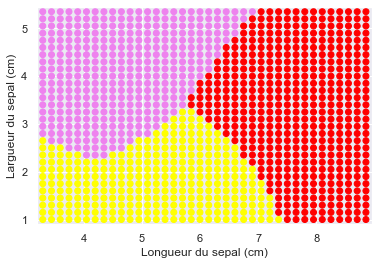

In [50]:
Z = clf.predict(data_samples)
#Z = Z.reshape(xx.shape)
plt.figure(1)
#plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y

# Plot also the training points
#plt.scatter(data[:, 0], data[:, 1], c=target)
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in Z]

plt.scatter(xx.ravel(), yy.ravel(), c=C)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

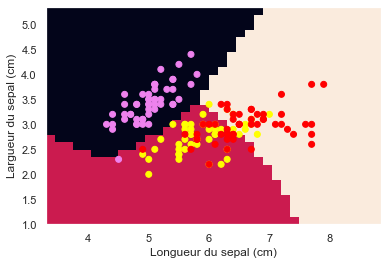

In [51]:
#Affichons le limites avec pcolormesh

plt.figure(1)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
# Plot also the training points
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

Essayons le même traitement en remplaçant GaussianNB par KN.

In [52]:
clf = neighbors.KNeighborsClassifier()
from ipywidgets import interact
@interact(n=(0,20))
def n_change(n=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data, target)
    Z = clf.predict(data_samples)
    plt.figure(1)
    plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
    # Plot also the training points
    colors = ['violet', 'yellow', 'red']
    C = [colors[x] for x in target]
    plt.scatter(data[:, 0], data[:, 1], c=C)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Longueur du sepal (cm)')
    plt.ylabel('Largueur du sepal (cm)');

interactive(children=(IntSlider(value=5, description='n', max=20), Output()), _dom_classes=('widget-interact',…

In [53]:
#Calcul de la précision de la prédiction en fonction de N

data_test, target_test = iris.data[::2], iris.target[::2]
data_train, target_train = iris.data[1::2], iris.target[1::2]
result = []
n_values = range(1,20)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data_train, target_train)
    Z = clf.predict(data_test)
    score = accuracy_score(Z, target_test)
    result.append(score)

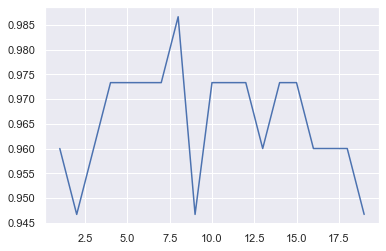

In [54]:
plt.plot(list(n_values), result)

Le graphique généré montre que la prédiction semble la meilleure pour N=8

# Apprentissage non supervisé

Réduction de dimension

In [56]:
from sklearn.decomposition import PCA
# Définition de l'hyperparamètre du nombre de composantes voulues
model = PCA(n_components=2)
# Alimentation du modèle
model.fit(iris.data)
# Transformation avec ses propres données
reduc = model.transform(iris.data )

In [57]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [58]:
#version réduite:
reduc[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [60]:
#Ajoutons les nouveaux paramètres dans le dataframe d'origine:
df['PCA1'] = reduc[:, 0]
df['PCA2'] = reduc[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755


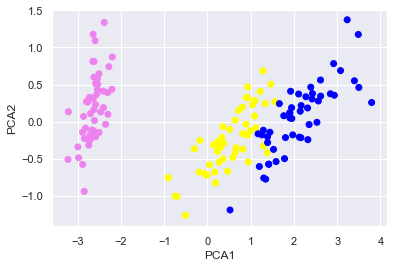

In [61]:
#Puis affichons les nouveaux couples de points (PCA1, PCA2) avec la couleur de l'espèce associée:
colors = ['violet', 'yellow', 'blue']
plt.scatter(df['PCA1'], df['PCA2'], c=[ colors[c] for c in df['target'] ]);
plt.xlabel('PCA1')
plt.ylabel('PCA2');

Nous obtenons 3 groupes plutôt bien dissociés !

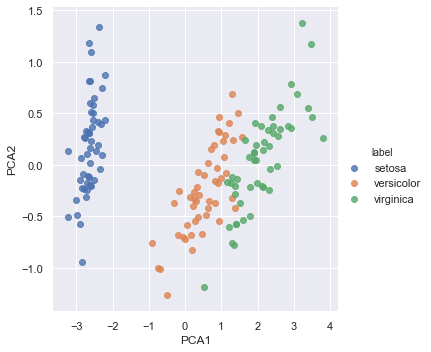

In [62]:
#Ce qui peut aussi s'obtenir avec Seaborn

sns.lmplot("PCA1", "PCA2", hue='label', data=df, fit_reg=False);

Clustering

In [63]:
from sklearn.mixture import GaussianMixture
# Création du modèle avec 3 groupes de données
model = GaussianMixture (n_components=3, covariance_type='full')
# Apprentissage, il n'y en a pas vraiment
model.fit(df[['PCA1', 'PCA2']])
# Prédiction
groups = model.predict(df[['PCA1', 'PCA2']])

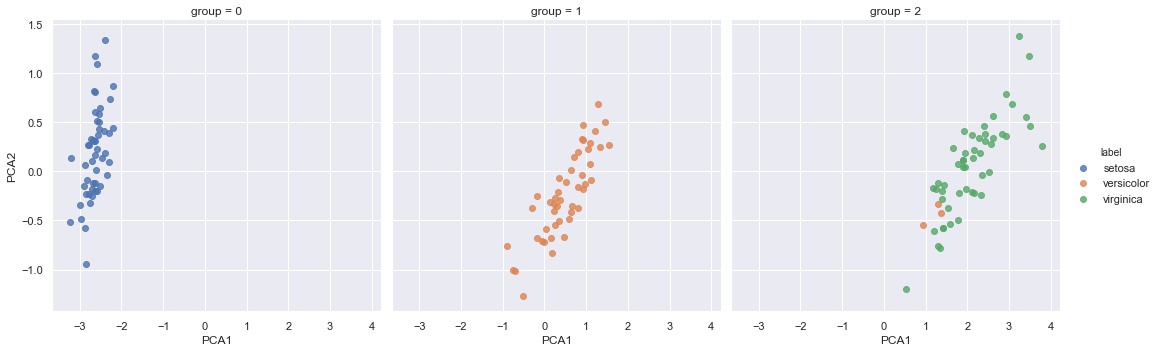

In [64]:
df['group'] = groups
sns.lmplot("PCA1", "PCA2", data=df, hue='label',
           col='group', fit_reg=False);